<a href="https://colab.research.google.com/github/sreeja-01p/FMML/blob/main/Matrix_Factorization_and_SVD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lab by Ganesh Chandan

kanakala.ganesh@research.iiit.ac.in

## Matrix Factorization (Based on Recommender System Example)

Matrix factorization is a way to generate latent features when multiplying two different kinds of entities. Collaborative filtering is the application of matrix factorization useful to identify the relationship between items’ and users’ entities in a recommender system.

Define a set of Users (U), items (D), R size of |U|, and |D|. The matrix |U|\*|D| includes all the ratings given by users. The goal is to discover K latent features. Given with the input of two matrics matrices P (|U|\*k) and Q (|D|\*k), it would generate the product result R.

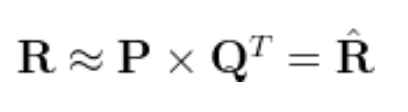

Matrix P represents the association between a user and the features while matrix Q represents the association between an item and the features. We can get the prediction of a rating of an item by the calculation of the dot product of the two vectors corresponding to u_i and d_j.

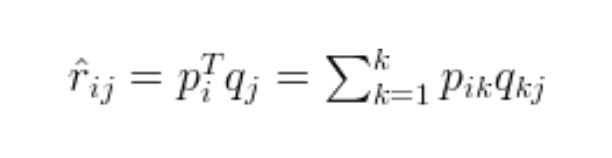

To get two entities of both P and Q, we need to initialize the two matrices and calculate the difference of the product named as matrix M. Next, we minimize the difference through the iterations. The method is called gradient descent, aiming at finding a local minimum of the difference.

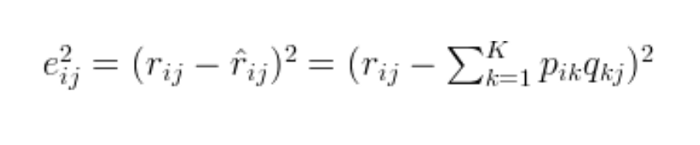

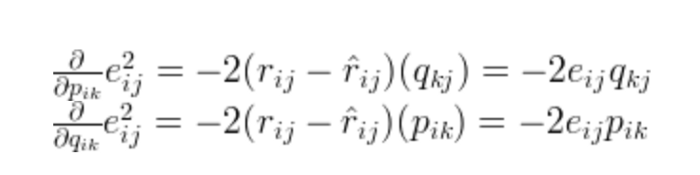

In [1]:
import numpy

def matrix_factorization(R, P, Q, K, steps=5000, alpha=0.0002, beta=0.02):
    '''
    R: rating matrix
    P: |U| * K (User features matrix)
    Q: |D| * K (Item features matrix)
    K: latent features
    steps: iterations
    alpha: learning rate
    beta: regularization parameter'''
    Q = Q.T

    for step in range(steps):
        for i in range(len(R)):
            for j in range(len(R[i])):
                if R[i][j] > 0:
                    # calculate error
                    eij = R[i][j] - numpy.dot(P[i,:],Q[:,j])

                    for k in range(K):
                        # calculate gradient with a and beta parameter
                        P[i][k] = P[i][k] + alpha * (2 * eij * Q[k][j] - beta * P[i][k])
                        Q[k][j] = Q[k][j] + alpha * (2 * eij * P[i][k] - beta * Q[k][j])

        eR = numpy.dot(P,Q)
        e = 0
        for i in range(len(R)):
            for j in range(len(R[i])):
                if R[i][j] > 0:
                    e = e + pow(R[i][j] - numpy.dot(P[i,:],Q[:,j]), 2)
                    for k in range(K):
                        e = e + (beta/2) * (pow(P[i][k],2) + pow(Q[k][j],2))
        # 0.001: local minimum
        if e < 0.001:
            break

    return P, Q.T

In [2]:
R = [
     [5,3,0,1],
     [4,0,0,1],
     [1,1,0,5],
     [1,0,0,4],
     [0,1,5,4],
     [2,1,3,0],
    ]

R = numpy.array(R)
# N: num of User
N = len(R)
# M: num of Movie
M = len(R[0])
# Num of Features
K = 3


P = numpy.random.rand(N,K)
Q = numpy.random.rand(M,K)



nP, nQ = matrix_factorization(R, P, Q, K)

nR = numpy.dot(nP, nQ.T)

The predicted matrix is generated below. As you can see, the predicted matrix has similar output with the true values, and the 0 ratings are replaced with the prediction based on the similar users’ preferences on movies.

In [3]:
print(nR)

[[4.98179729 2.96409694 4.01085833 1.00274156]
 [3.97514408 1.97848705 3.52582843 1.00071414]
 [1.02057214 0.95761999 3.84653454 4.96983447]
 [0.99099659 0.59240915 3.33506105 3.98174477]
 [2.91115989 1.04969026 4.96791258 3.9940065 ]
 [1.98569674 0.99507611 3.00015288 2.35072216]]


## SVD (Continuing the Recommender System Example)

When it comes to dimensionality reduction, the Singular Value Decomposition (SVD) is a popular method in linear algebra for matrix factorization in machine learning. Such a method shrinks the space dimension from N-dimension to K-dimension (where K < N) and reduces the number of features. SVD constructs a matrix with the row of users and columns of items and the elements are given by the users’ ratings. Singular value decomposition decomposes a matrix into three other matrices and extracts the factors from the factorization of a high-level (user-item-rating) matrix.

The factorisation of this matrix is done by the singular value decomposition. It finds factors of matrices from the factorisation of a high-level (user-item-rating) matrix. The singular value decomposition is a method of decomposing a matrix into three other matrices as given below:

image.png

Where A is a m x n utility matrix, U is a m x r orthogonal left singular matrix, which represents the relationship between users and latent factors, S is a r x r diagonal matrix, which describes the strength of each latent factor and V is a r x n diagonal right singular matrix, which indicates the similarity between items and latent factors. The latent factors here are the characteristics of the items, for example, the genre of the music. The SVD decreases the dimension of the utility matrix A by extracting its latent factors. It maps each user and each item into a r-dimensional latent space. This mapping facilitates a clear representation of relationships between users and items.

## Working with Text 1 : Bag of Words Model

A problem with modeling text is that it is messy, and techniques like machine learning algorithms prefer well defined fixed-length inputs and outputs. Machine learning algorithms cannot work with raw text directly; the text must be converted into numbers. Specifically, vectors of numbers.

A bag-of-words model, or BoW for short, is a way of extracting features from text for use in modeling, such as with machine learning algorithms.

The approach is very simple and flexible, and can be used in a myriad of ways for extracting features from documents.

A bag-of-words is a representation of text that describes the occurrence of words within a document. It involves two things:

    A vocabulary of known words.
    A measure of the presence of known words.


Let's try BoW model on an example

The sentences are -

1.   grey is a dull color
2.   orange is a fruit
3.   orange is a colour


In [4]:
sentences = [["grey", "is", "a", "dull", "colour"], ["orange", "is", "a", "fruit"], ["orange", "is", "a", "colour"]]
# Add your sentences here and see the embeddings

# The vocabulary is -
# vocabulary = ["grey", "is", "a", "dull", "colour", "orange", "fruit"]

vocabulary = []
for sentence in sentences:
  for word in sentence:
    if word not in vocabulary:
      vocabulary.append(word)

print(vocabulary)

['grey', 'is', 'a', 'dull', 'colour', 'orange', 'fruit']


Now we need to find which words occur in a given sentence and hence assign each sentence a corresponding vector based upon multiple metrics.

This can be done in a few ways :
1. Boolean count of whether the word occurs in a sentence
2. Counts of each word that occurs in a sentence
3. Frequency of words out of all oher words in a sentence
4. TF-IDF (will be covered in next lab)

In [5]:
# We shall implement point 2 now

bow_sentences = []

for sentence in sentences:
  bow_representation = [0 for i in range(len(vocabulary))]
  for indx, word in enumerate(vocabulary):
    if word in sentence:
      bow_representation[indx]+=1
  bow_sentences.append(bow_representation)

In [6]:
print(bow_sentences)

[[1, 1, 1, 1, 1, 0, 0], [0, 1, 1, 0, 0, 1, 1], [0, 1, 1, 0, 1, 1, 0]]


**You can now try to add your sentences and see how it works!**

## Working with Text 2 : LSI (Latent Semantic Indexing)

Now, we will introduce an indexing and retrieval method: the Latent Semantic Indexing (LSI). It uses a mathematical technique called singular value decomposition (SVD) to identify patterns in the relationships between the terms and concepts contained in a corpus (unstructured collection of documents).

Latent Semantic Indexing is a common technique in the NLP field. It is used to analyze relationships between a set of documents and the terms they contain in order to produce a set of concepts related to the documents and terms.

LSI is based on the distributional hypothesis which states that words that are close in meaning will occur in similar pieces of text. The starting point is the representation matrix $A$ of the distribution of the words within the set of documents. It is a $m * n$ matrix where $m$ is the number of unique words and $n$ is the corpus cardinality. The element $a_{ij}$ represents the frequency of the word $i$ in the document $j$.

Singular Value Decomposition (SVD) is consequently applied to the matrix A in order to reduce the dimensionality of the data.

The SVD computes the term and document vector spaces by approximating the single term-frequency matrix $A$ as follows:

$$
A \approx TSD^T
$$

where $T$ is the $m * r$ term-concept vector matrix, $S$ is the $r * r$ singular values matrix, $D$ is the $n * r$ concept-document vector matrix, such that

$$
T^{T}T = I_r \\
D^{T}D = I_r \\
S_{11}\ge S_{22}\ge ... \ge S_{rr} \ge 0 \\ S_{ij}=0 \hspace{1cm} \forall i \ne j
$$

The next step is to truncate the SVD and keep only the largest $k$ << $r$ diagonal entries in the singular value matrix $S$, where $k$ is typically on the order 100 to 300 dimensions. This effectively reduces the term matrix $T$ size to $m * k$ and the document matrix $D$ size to $n * k$.

Let us now get started with the code! Note that we will use a library **gensim**, which does most of the hard work for us.

In [7]:
# Install requires lirbaries

!pip install --upgrade gensim
import pandas as pd
import gensim
from gensim.parsing.preprocessing import preprocess_documents

In [8]:
# !curl -L -o 'movies.csv' 'https://drive.google.com/uc?export=download&id=1F9l2PUvLtmd75_VFrqNnH-x_AR7zIhQW'

!curl -L -o 'wiki_movies_plots_deduped.csv' 'https://drive.usercontent.google.com/u/0/uc?id=12k4ltUwdhg525XW4dT6hgW18t_Fil3Hj&export=download'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 77.4M  100 77.4M    0     0  2871k      0  0:00:27  0:00:27 --:--:-- 17.7M


In [9]:
df = pd.read_csv('wiki_movies_plots_deduped.csv', sep=',', usecols = ['Release Year', 'Title', 'Plot'])
df = df[df['Release Year'] >= 2000] # Use a subset of the data
text_corpus = df['Plot'].values # Get the movie plots

In [10]:
print(text_corpus)

["After three years in prison, Cruella de Vil has been cured of her desire for fur coats by Dr. Pavlov and is released into the custody of the probation office on the provision that she will be forced to pay the remainder of her fortune (eight million pounds) to all the dog shelters in the borough of Westminster should she repeat her crime. Cruella therefore mends her working relationship with her valet Alonzo and has him lock away all her fur coats. Cruella's probation officer, Chloe Simon, nevertheless suspects her, partly because Chloe is the owner of the now-adult Dipstick (one of the original 15 puppies from the previous film) who moved from Roger and Anita's house to her house.\r\nDipstick's mate, Dottie, has recently given birth to three puppies: Domino, Little Dipper and Oddball (who lacks spots). To mend her reputation, Cruella buys the Second Chance Dog shelter, owned by Kevin Shepherd, to resolve its financial insolvency that is on the verge of eviction. Meanwhile, Dr. Pavlo

In [11]:
processed_corpus = preprocess_documents(text_corpus) # Preprocess the text
dictionary = gensim.corpora.Dictionary(processed_corpus)
bow_corpus = [dictionary.doc2bow(text) for text in processed_corpus] # Find the BoW representations

In [12]:
tfidf = gensim.models.TfidfModel(bow_corpus, smartirs='npu') # Perform TF-IDF to get the matrix
corpus_tfidf = tfidf[bow_corpus]

In [13]:
lsi = gensim.models.LsiModel(corpus_tfidf, num_topics=1000) # Perform LSI
index = gensim.similarities.MatrixSimilarity(lsi[corpus_tfidf])

In [14]:
new_doc = "In the arcade at night the video game characters leave their games. The protagonist is a girl from a candy racing game who glitches"
# new_doc = "Boy studies ballet in secret. His father wants him to go to the gym and boxe. They raise money for audition in London"

new_doc = gensim.parsing.preprocessing.preprocess_string(new_doc)
new_vec = dictionary.doc2bow(new_doc)
vec_bow_tfidf = tfidf[new_vec]
vec_lsi = lsi[vec_bow_tfidf]
sims = index[vec_lsi]
for s in sorted(enumerate(sims), key=lambda item: -item[1])[:10]:
    print(f"{df['Title'].iloc[s[0]]} : {str(s[1])}")

Candlestick : 0.782285
Overlord: The Undead King : 0.77930534
Overlord: The Dark Warrior : 0.77930534
Wreck-It Ralph : 0.71107984
Inferno : 0.69542515
Kami-sama no Iu Toori : 0.6902499
Sex Competition : 0.6605684
 Facing the Giants : 0.6060971
Sleuth : 0.60471106
Glory Road : 0.58239186


As you can see we give the description of the movie "Wreck-it Ralph" and it appears as the third recommended. We are doing a great job with LSI!

Feel free to change the description and see what movies you get :)

## Points to think about

1. How exactly does matrix factorization help us in the recommendation procedure? Why can we not simply model the user-movie matrix?

2. What do the rows of the matrix $T$ represent? (Definition of $T$ is above in the introduction to LSI).

**Answers**

1. Matrix factorization helps in recommendation systems by reducing the high-dimensional user-item matrix into lower-dimensional latent feature matrices, capturing hidden relationships between users and items. It enables filling in missing values and making personalized predictions efficiently. Simply modeling the user-movie matrix is impractical due to sparsity, scalability issues, and the inability to capture latent patterns.

2. In Latent Semantic Indexing (LSI), the rows of matrix T represent latent topics or concepts extracted from the data. These rows indicate how strongly each topic is associated with the original features, such as words in documents or user preferences in recommendation systems.

## Resources and References

1. https://medium.com/betacom/latent-semantic-indexing-in-python-85880414b4de
2. https://www.analyticssteps.com/blogs/introduction-latent-semantic-analysis-lsa-and-latent-dirichlet-allocation-lda
3. https://towardsdatascience.com/recommendation-system-matrix-factorization-d61978660b4b
4. https://analyticsindiamag.com/singular-value-decomposition-svd-application-recommender-system/
5. https://machinelearningmastery.com/gentle-introduction-bag-words-model/

# Exercise
* Try out different modes of bag of words
* Experiment with different plots from the sheet and check the scores


**Answers:**

1.

In [17]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split

text_corpus = df['Plot'].astype(str).tolist()

vectorizers = {
    "Binary BoW": CountVectorizer(binary=True),
    "Frequency BoW": CountVectorizer(),
    "TF-IDF": TfidfVectorizer()
}

bow_representations = {}
for name, vectorizer in vectorizers.items():
    bow_representations[name] = vectorizer.fit_transform(text_corpus)
    print(f"{name} has shape: {bow_representations[name].shape}")

Binary BoW has shape: (12560, 86759)
Frequency BoW has shape: (12560, 86759)
TF-IDF has shape: (12560, 86759)


2.

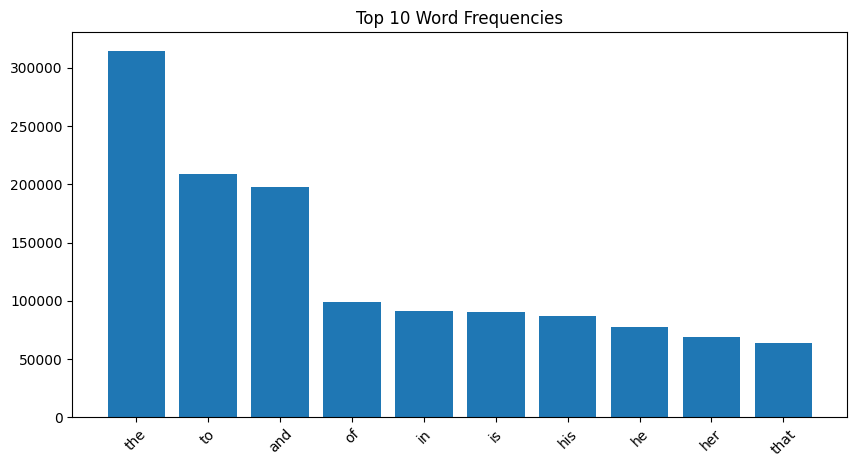

In [18]:
import matplotlib.pyplot as plt
import numpy as np

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(text_corpus)

word_counts = np.asarray(X.sum(axis=0)).flatten()
word_names = vectorizer.get_feature_names_out()

sorted_idx = np.argsort(word_counts)[::-1][:10]
plt.figure(figsize=(10, 5))
plt.bar(np.array(word_names)[sorted_idx], word_counts[sorted_idx])
plt.title("Top 10 Word Frequencies")
plt.xticks(rotation=45)
plt.show()

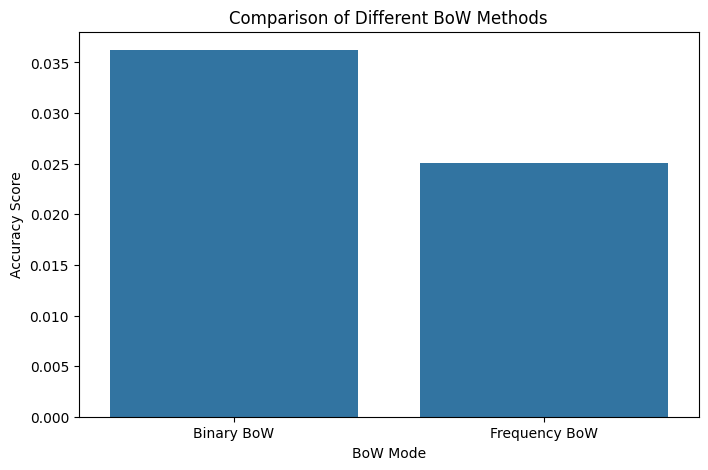

In [20]:
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.barplot(x=list(scores.keys()), y=list(scores.values()))
plt.xlabel("BoW Mode")
plt.ylabel("Accuracy Score")
plt.title("Comparison of Different BoW Methods")
plt.show()